# Pre-machine learning

# Likelihood - Método metrópolis

Usando los mismos datos anteriores ahora intentaremos encontrar la recta más acercada con el método de metrópolis

In [192]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [193]:
import numpy as np
import pandas as pd
import math as m
import matplotlib.pyplot as plt
import pickle
import matplotlib.colors as mcolors

In [194]:

data = np.load('fit_exercise.npy') 
#data

x = data[0,:]      #primer renglón
#print(x)
x_avrg = x.mean
y = data[1,:]      #segundo renglón
y_err = data[2,:]  #tercer renglón
n = len(x)

In [195]:
#datos proporcionados por la maestra, son 3 columnas, x, y, error de y
#La columna "error de y" nos servirá para la distribución chi^2

#data = np.loadtxt('data_gaussiano.dat') 
#data

#DesvEst = 3
#mean = x.mean()

#x = data[0,:]
#y = data[1,:]

#print(len(x))
#print(y)

#n = len(x) #Tamaño de  nuestros vectores

#x_avrg = x.mean() 
#y_bar = y.mean()

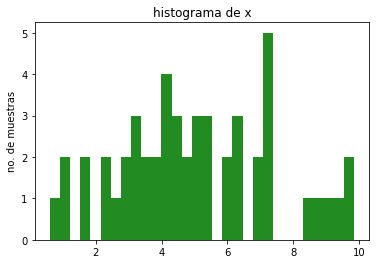

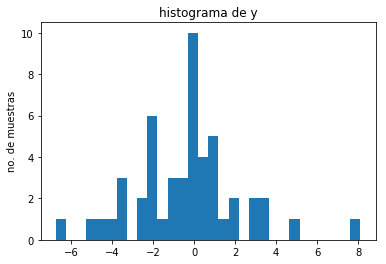

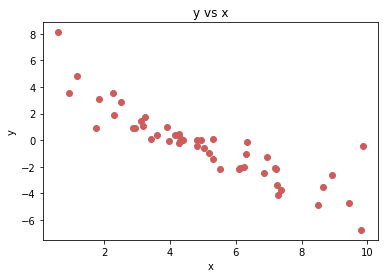

In [196]:
a = 30 #numero de barras para el histograma
plt.hist(x,a,color ='forestgreen')
plt.ylabel('no. de muestras')
plt.title('histograma de x')
plt.show()

plt.hist(y,a)
plt.ylabel('no. de muestras')
plt.title('histograma de y')
plt.show()

plt.plot(x,y,'o',color = 'indianred')
plt.title('y vs x')
plt.ylabel('y')
plt.xlabel('x')
plt.show()

In [205]:
#definimos la función con la que aproximaremos nuestro likelihood, en este caso es una func. gaussiana
# def f(x,DesviacionEstandar,xAverage):
#     f = 1
#     n = len(x)
#     A = (2*np.pi*DesviacionEstandar)**(-1/2) #constante
#     for i in range(n):
#         f = A*f*(np.exp(-(1/(2*(DesviacionEstandar**2)))*(x[i] + xAverage)**2))
#     return f

"""definimos la función con la que aproximaremos nuestro likelihood, en este caso es una func. lineal"""

def f(x,pendiente,cte):
    f = pendiente*x + cte
    return f

"""definimos una función para el likelihood"""
def LogLikelihood(x,pendiente,cte,y,DesviacionEstandar):
    LogL=0
    n = len(x)
    for i in range(n):
        LogL = LogL + ((y[i] - f(x[i],pendiente,cte))**2)/(2*((DesviacionEstandar[i])**2)) #+(n/2)*np.log(2*np.pi*(DesviacionEstandar[i])**2)
    return LogL


In [206]:
"""Vamos a definir una función en la que nosotros vamos a definir la probabilidad de encontrar nuestros
datos en un intervalo específico (en base l plot de x vs y)"""

"""La probabilidad (Prior de m) de encontrar a m en cierto intervalo"""

def Prior_m(pendiente):
    m_min = -1
    m_max = -0.2
    if m_min<= pendiente and pendiente<= m_max:
        Pm = 1/(m_max-m_min)
    else:
        Pm = 0
    return Pm

"""La probabilidad (Prior de b) de encontrar a b en cierto intervalo""" 

def Prior_b(cte):
    b_min = 2
    b_max = 5
    if b_min<= cte and cte <= b_max:
        Pb = 1/(b_max-b_min)
    else:
        Pb = 0
    return Pb

In [207]:
Prior_m(0)

0

In [208]:
def Post(m_n,b_n,x,y,sigma):
    LogPos = (Prior_m(m_n))*(Prior_b(b_n))*np.exp(LogLikelihood(x,m_n,b_n,y,sigma))
    return LogPos

C:\Users\Dea\Documents\anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
C:\Users\Dea\Documents\anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


m =  0.8399133460815942
b =  0.9311484431796073


Text(0,0.5,'b')

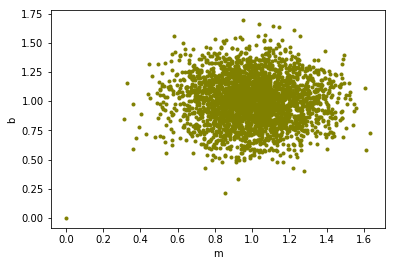

In [209]:
"""Aquí vamos a comenzar a hacer iteraciones de los valores de m y de b para encontrar el que se acerque más a la línea ideal.
Para esto comenzaremos en los 'm' y 'b' que fijamos anteriormente y le añadiremos un valor ALEATORIO hacia el cual
se pueda mover de manera que se acerque a la solución más acertada"""
n_pasos = 3000 #número de iteraciones que vamos a realizar nuestro experimento-
#delta = 1
m_v = 1
b_v = 1
Post_v = Post(m_v,b_v,x,y,y_err)

mb = np.zeros([n_pasos + 1,2])
mb[0] = [m_v,b_v]

counting = 0
for i in range(1,n_pasos):
    m_rnd = np.random.normal(m_v,0.2)  #m aleatorios
    b_rnd = np.random.normal(b_v,0.2)  #b aleatorios
    #el 0.5 es para que también nos den número negativos
    
    m_n = m_rnd  #aquí guardamos moentáneamente 'm'
    b_n = b_rnd #aquí guardamos moentáneamente 'b'
    
    Post_n = Post(m_n,b_n,x,y,y_err)
    #print(Post_n)
    mb[i+1] = [m_n,b_n]
    
    if Post_n > Post_v: #comparamos si el likelihood nuevo es mayor al viejo
        
        """Reevaluamos los valores de nuestras constantes"""
        
        Post_v = np.copy(Post_n)
        m_v = np.copy(m_n)
        b_v = np.copy(b_n)
        #print('nuevo Posterior viejo',Post_v)
        #counting = counting+1
        
        
        
    elif Post_n/Post_v > np.random.rand():
        Post_v = np.copy(Post_n)
        m_v = np.copy(m_n)
        b_v = np.copy(b_n)
        #print('nuevo Posterior viejo',Post_v)
        counting = counting+1
        
        #plt.plot(m_n,b_n,'o')
        #plt.xlabel('m')
        #plt.ylabel('b')
        
        #print('m = ',m_n)
        #print('b = ',b_n)    
        
print('m = ',m_n)
print('b = ',b_n)    
#print('número de iteraciones1:',counting)
plt.plot(mb[:,0],mb[:,1],'.', color = 'olive')
plt.xlabel('m')
plt.ylabel('b')

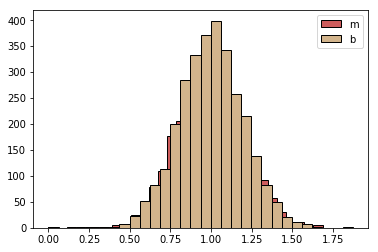

In [202]:
plt.hist(mb[:,0],30, color = 'indianred', edgecolor = 'k', label = 'm')
plt.hist(mb[:,1],30, color = 'tan', edgecolor = 'k', label = 'b')
plt.legend()

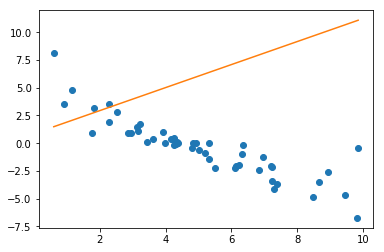

In [203]:
plt.plot(x,y,'o')
plt.plot(x,f(x,m_n,b_n))

In [204]:
print('valor real de m:',  -0.9821623517930425)
print('valor real de b:', 4.5778593037533595)

valor real de m: -0.9821623517930425
valor real de b: 4.5778593037533595
